## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns=['EIN','NAME'])

In [3]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
app_bin_list = app_counts[app_counts> 500]

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
application_types_to_replace = app_bin_list

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C2190        1
C3700        1
C1370        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C0           3
C2710        3
C1260        3
C3200        2
C1246        2
C1234        2
C1256        2
C1267        2
Name: CLASSIFICATION, dtype: int64

In [9]:
counts_to_bin = list(classification_counts[classification_counts < 1000].index)

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
classifications_to_replace = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(df)

In [12]:
# Split our preprocessed data into our features and target arrays
# we only need the values for tensors

X = dummies_df.drop(columns=['IS_SUCCESSFUL']).values
y = dummies_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state = 42)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=len(X_train[0]))) #len(X_train[0]) == features in DF

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,621
Trainable params: 6,621
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 1s 707us/step - loss: 0.5716 - accuracy: 0.7196
Epoch 2/150
804/804 [==============================] - 1s 687us/step - loss: 0.5569 - accuracy: 0.7273
Epoch 3/150
804/804 [==============================] - 1s 680us/step - loss: 0.5535 - accuracy: 0.7286
Epoch 4/150
804/804 [==============================] - 1s 695us/step - loss: 0.5513 - accuracy: 0.7308
Epoch 5/150
804/804 [==============================] - 1s 657us/step - loss: 0.5494 - accuracy: 0.7315
Epoch 6/150
804/804 [==============================] - 1s 664us/step - loss: 0.5492 - accuracy: 0.7314
Epoch 7/150
804/804 [==============================] - 1s 661us/step - loss: 0.5477 - accuracy: 0.7327
Epoch 8/150
804/804 [==============================] - 1s 663us/step - loss: 0.5466 - accuracy: 0.7316
Epoch 9/150
804/804 [==============================] - 1s 671us/step - loss: 0.5465 - accuracy: 0.7325
Epoch 10/150
804/804 [==============================] - 1s 698us/step - l

804/804 [==============================] - 1s 683us/step - loss: 0.5351 - accuracy: 0.7395
Epoch 80/150
804/804 [==============================] - 1s 677us/step - loss: 0.5351 - accuracy: 0.7395
Epoch 81/150
804/804 [==============================] - 1s 683us/step - loss: 0.5351 - accuracy: 0.7397
Epoch 82/150
804/804 [==============================] - 1s 669us/step - loss: 0.5348 - accuracy: 0.7402
Epoch 83/150
804/804 [==============================] - 1s 669us/step - loss: 0.5347 - accuracy: 0.7398
Epoch 84/150
804/804 [==============================] - 1s 670us/step - loss: 0.5349 - accuracy: 0.7403
Epoch 85/150
804/804 [==============================] - 1s 679us/step - loss: 0.5351 - accuracy: 0.7389
Epoch 86/150
804/804 [==============================] - 1s 678us/step - loss: 0.5350 - accuracy: 0.7399
Epoch 87/150
804/804 [==============================] - 1s 676us/step - loss: 0.5344 - accuracy: 0.7395
Epoch 88/150
804/804 [==============================] - 1s 672us/step - loss:

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5694 - accuracy: 0.7271 - 220ms/epoch - 822us/step
Loss: 0.5694276094436646, Accuracy: 0.7271137237548828


In [18]:
nn_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 51),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 51),
    'dtype': 'float32',
    'units': 80,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 30,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initia

<AxesSubplot:>

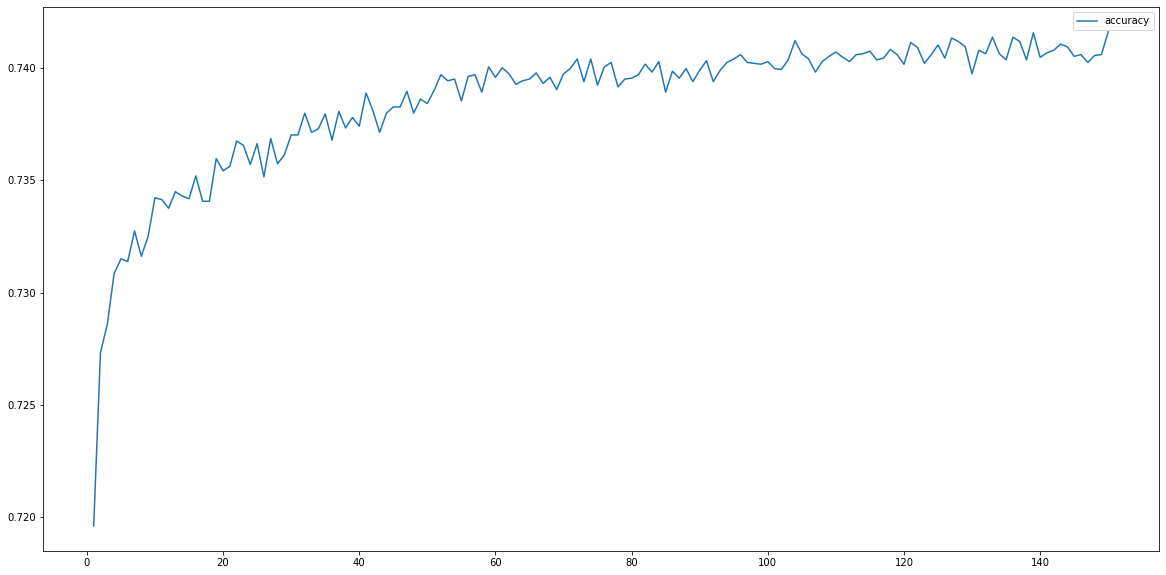

In [19]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

history_df.plot(y='accuracy', figsize=(20,10))

In [20]:
# Export our model to HDF5 file
nn_model.save(f'model_01_Acc_{round(model_accuracy,3)}.h5')


------

# Expanding Hyperparameters

After seeing the accuracy and loss of a model with many input dimensions and low layers, lets compare when allowing the models parameters to be chosen by Keras_Tuner using pre-defined values.

-------

In [21]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=len(X_train[0]))) ## make sure the input dimensions are equal to the number of features

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [22]:
 # Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [23]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test)) 

INFO:tensorflow:Oracle triggered exit


In [24]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 7,
 'num_layers': 3,
 'units_0': 7,
 'units_1': 7,
 'units_2': 9,
 'units_3': 3,
 'units_4': 5,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '610937148361f0abd0e5627ae992a29d'}

In [25]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print()
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5569 - accuracy: 0.7327 - 262ms/epoch - 978us/step

Loss: 0.5568960309028625, Accuracy: 0.7327113747596741


In [26]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
activation: tanh
first_units: 7
num_layers: 3
units_0: 7
units_1: 7
units_2: 9
units_3: 3
units_4: 5
units_5: 9
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 610937148361f0abd0e5627ae992a29d
Score: 0.7327113747596741
Trial summary
Hyperparameters:
activation: tanh
first_units: 5
num_layers: 2
units_0: 3
units_1: 3
units_2: 3
units_3: 5
units_4: 1
units_5: 3
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7321282625198364
Trial summary
Hyperparameters:
activation: sigmoid
first_units: 9
num_layers: 1
units_0: 3
units_1: 9
units_2: 9
units_3: 9
units_4: 5
units_5: 9
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7320116758346558
Trial summary
Hyperparameters:
activation: tanh
first_units: 9
num_layers: 1
units_0: 7
units_1: 9
units_2: 7

In [27]:
# Export our model to HDF5 file
# tuner.save_model('keras_tuner_auto_model.h5')

tf.keras.models.save_model(
    best_model,
    f'keras_model_Acc_{round(model_accuracy,3)}.h5',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

-------------

# Running the User Model using Tanh after Keras Tuner observation

-----------------

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh", input_dim=len(X_train[0]))) #len(X_train[0]) == features in DF

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                4160      
                                                                 
 dense_6 (Dense)             (None, 30)                2430      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,621
Trainable params: 6,621
Non-trainable params: 0
_________________________________________________________________


In [29]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [30]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 1s 691us/step - loss: 0.5711 - accuracy: 0.7203
Epoch 2/150
804/804 [==============================] - 1s 682us/step - loss: 0.5566 - accuracy: 0.7298
Epoch 3/150
804/804 [==============================] - 1s 668us/step - loss: 0.5532 - accuracy: 0.7292
Epoch 4/150
804/804 [==============================] - 1s 672us/step - loss: 0.5518 - accuracy: 0.7305
Epoch 5/150
804/804 [==============================] - 1s 686us/step - loss: 0.5499 - accuracy: 0.7313
Epoch 6/150
804/804 [==============================] - 1s 679us/step - loss: 0.5484 - accuracy: 0.7308
Epoch 7/150
804/804 [==============================] - 1s 689us/step - loss: 0.5476 - accuracy: 0.7304
Epoch 8/150
804/804 [==============================] - 1s 668us/step - loss: 0.5470 - accuracy: 0.7323
Epoch 9/150
804/804 [==============================] - 1s 708us/step - loss: 0.5461 - accuracy: 0.7303
Epoch 10/150
804/804 [==============================] - 1s 692us/step - l

804/804 [==============================] - 1s 686us/step - loss: 0.5313 - accuracy: 0.7421
Epoch 80/150
804/804 [==============================] - 1s 695us/step - loss: 0.5316 - accuracy: 0.7408
Epoch 81/150
804/804 [==============================] - 1s 675us/step - loss: 0.5315 - accuracy: 0.7416
Epoch 82/150
804/804 [==============================] - 1s 672us/step - loss: 0.5316 - accuracy: 0.7413
Epoch 83/150
804/804 [==============================] - 1s 696us/step - loss: 0.5315 - accuracy: 0.7421
Epoch 84/150
804/804 [==============================] - 1s 677us/step - loss: 0.5313 - accuracy: 0.7409
Epoch 85/150
804/804 [==============================] - 1s 678us/step - loss: 0.5312 - accuracy: 0.7413
Epoch 86/150
804/804 [==============================] - 1s 674us/step - loss: 0.5313 - accuracy: 0.7414
Epoch 87/150
804/804 [==============================] - 1s 713us/step - loss: 0.5312 - accuracy: 0.7413
Epoch 88/150
804/804 [==============================] - 1s 696us/step - loss:

In [31]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print()
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5658 - accuracy: 0.7290 - 206ms/epoch - 768us/step

Loss: 0.5657778382301331, Accuracy: 0.7289795875549316


<AxesSubplot:>

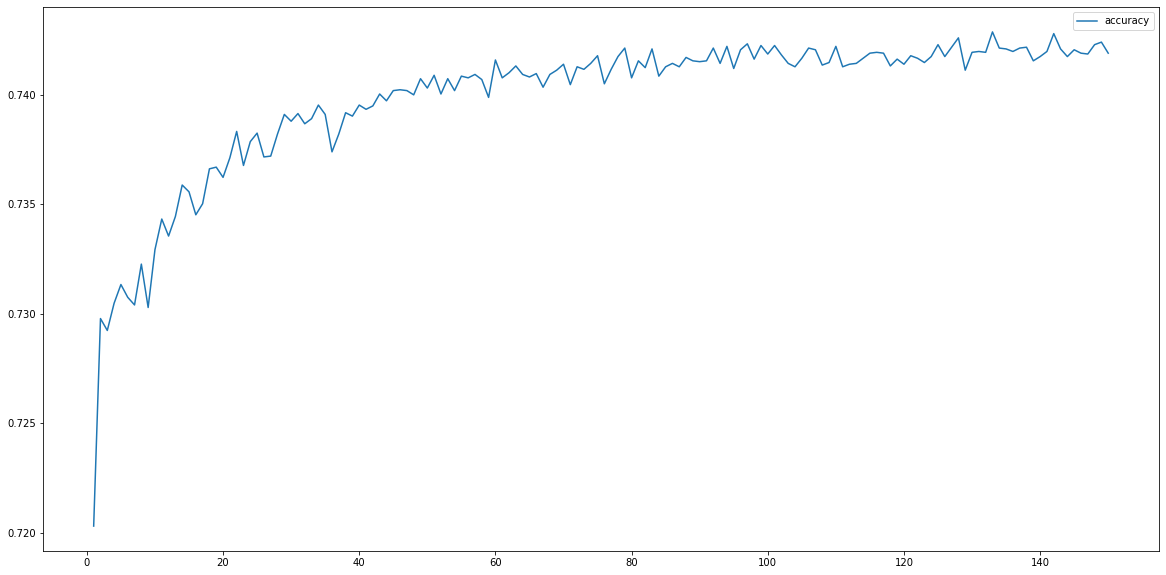

In [32]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

history_df.plot(y='accuracy', figsize=(20,10))